### <div align="center">Ensemble Learning - Classification</div>

##### 5.1: What is Ensemble Learning ?
- Ensemble learning is a strategy in machine learning where we join predictions from several models. This approach helps us get a more precise and resilient forecast. 
- It can be achieved using any of the techniques below
  - Basic Techniques:
    1. Majority Vote
    2. Average
    3. Weighted Average
  - Advanced Techniques:
    1. Bagging
    2. Boosting
    3. Stacking

##### 5.2: Majority Voting, Average and Weighted Average
- The voting classifier (sklearn.ensemble.VotingClassifier) typically employs the "hard" method, which is based on majority rule voting. However, for classifiers that are well-calibrated, the "soft" method is suggested. This method determines class labels according to the argmax of the predicted probabilities.
- In weighted average, we can provide the more weight to trusted model and calculate the vote.
- The Voting Regressor method will be used for regression, just as the Voting Classifier demonstrated for classification in the video.

##### 5.3: Bagging
- Bagging in ensemble learning is a technique where paralelly multiple models are trained on random subsets of the training data and their predictions are aggregated to improve accuracy and reduce variance.
- Random sampling with replacement is also called bootstrapping.
- Each model in ensemble learning is called a Base learner.
- Bagging is also known as bootstrap aggregating.
- Benefit of bagging
  - Robust against Outliers (Since it is an aggregated sum of base learner).
  - Reduction in Variance (May be one or two model will be overfit but still due to aggregated value variance will be less).
  - A good way to handle high dimensional (More feature).
  - Improved Accuracy (Due to wisdom of croud).

##### 5.4: Bagging - Random Forest
- Random forest stands as one of the two key algorithms in Machine Learning.
- A random forest is a learning method that constructs multiple decision trees on random data subsets and features during the training phase, delivering the class that represents the mode of the classes or the average prediction of the individual trees.
- In random forest we do row and column sampling (For each model we can choose random column/feature).
- The use of random forest provides a unique perspective on the data, enhancing the robustness of your model.
##### 5.5: Random Forest - Raisin Classification
- Random Forest is versatile, suitable for both classification and regression tasks.
- All models in the Random Forest share the same decision tree criterion.
- Depending on the specific use case or scenario, parameters and arguments can be adjusted for optimal model performance.

##### 5.8: Boosting - AdaBoost
- Boosting in machine learning is a sequential process where multiple models, typically weak learners, are trained one after the other, with each model building upon the errors of its predecessor to improve overall accuracy and form a strong predictive model.
- Different Boosting Techniques:
  - AdaBoost
  - Gradient Boost
  - XGBoost (eXtreme Gradient Boosting)
  - LightGBM
  - CatBoost
- A Decision Stump is a tree that has one root node and two child nodes.
- AdaBoost is a machine learning algorithm that adjusts training instances’ weights based on prior models’ errors. It emphasizes wrongly predicted instances, increases their weights, and enhances the ensemble’s overall accuracy.
- class sklearn.ensemble.AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
- Formulas Used:
  - Total Error – It is a sum of the weight of all the incorrect predictions
  - Amount of Say (α) = (½) log ( (1 - error) / error )
  - Correct Prediction → New weight = old weight × e^(–α)
  - Incorrect Prediction → New weight = old weight × e^(α)

##### 5.9: Gradient Boosting: Regression Walk Through
- Gradient boosting is an ensemble machine learning technique that iteratively trains decision trees on residual errors, combining them with a learning rate to improve model accuracy progressively.
- Gradient Boost is the sequence of weak learner and the first week learner is the mean called prediction.
- Residual = Actual - Predicted (mean) 
- The residuals can be referred to as pseudo-residuals.
- Fₖ(x) = F₀(x) + Learning Rate * PR1 + Learning Rate * PR2 + ….. + Learning Rate * PRK
- n_estimators is equal to no of weak learners in parameter.

##### 5.14: Gradient Boosting: Classification
- In Regression we use loss function as Mean Squared Error and in Classification we use Logistic loss (Log loss).
- Gradient Boosting applies a similar method for both classification and regression, with the only difference being the loss function – Logistic Loss for classification and Mean Squared Error for regression.
- When contrasted with a decision tree or random forest, gradient boosting has a slight edge in terms of performance and overall prediction accuracy.

<h3 align="center">Gradient Boosting Classifier: Titanic Survival</h3>

In [2]:
# Load Data
#Dataset Citation: This dataset was downloaded from standford university website. 

import pandas as pd

# df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
df = pd.read_csv("../data/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.shape

(887, 8)

In [4]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [5]:
df['Sex'] = df['Sex'].map({'male': 1,  'female': 2})
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,2,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,2,26.0,0,0,7.9250


In [6]:
# drop Name column which is not useful in determining the survival rate
df.drop("Name", axis="columns", inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,2,38.0,1,0,71.2833
2,1,3,2,26.0,0,0,7.9250


In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Survived',axis="columns")
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Model Training Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       166
           1       0.71      0.71      0.71       101

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



In [9]:
# Model Training Using Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       166
           1       0.82      0.67      0.74       101

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



If you compare classification report across decision tree, random forest and gradient boost, you will notice slight improvement in precision, recall and accuracy when we use gradient boosting

##### 5.15: XGBoost - Walk Through
- XGBoost is the Powerful and widely used statistical machine learning algorithm in industry.
- XGBoost is a high-performance machine learning library that constructs decision trees using exact and approximate algorithms for split finding. It uses post-growth tree pruning to enhance model accuracy and scalability, particularly for large datasets, while minimizing over fitting.
- Logistic regression is good when we have linear relationship between features and target variable where as XGBoost is tree based learning model and is good at capturing non linear relationship. It uses weak classifier (Wisdom of croud).

##### 5.18: XGBoost - Benefits
- High Accuracy
  1. Better at modeling complex non-linear relationships due to tree-based learning and boosting approach.
  2. In built regularization
  3. Automatic Handling of missing values
  4. Feature importance and selection
- Very Fast
  1. Tree Pruning
  2. Block structure and parallel processing
  3. Cache Awareness
  4. Efficient Handling of Sparse Data

### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

In [13]:
#Import Necessary Libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [14]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv("../data/milk_quality_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (1059, 8)
First few rows of the dataset:


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [15]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64


In [16]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['grade'] = df['grade'].map(grade_mapping)

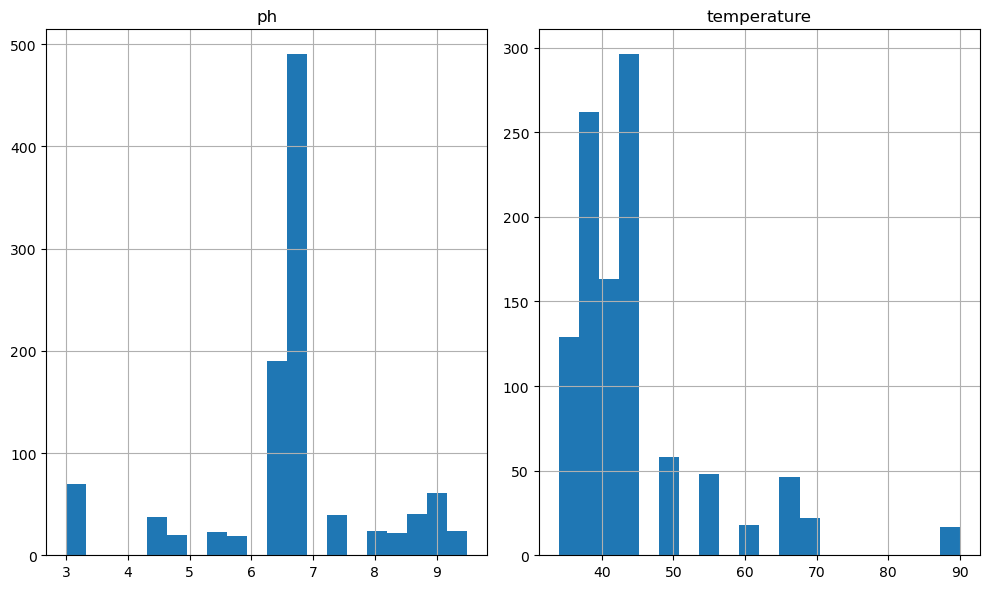

In [17]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms
df[['ph', 'temperature']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [19]:
# Step 1: Select the features and target variable for modeling
X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Step 3: Initialize and train a Logistic Regression model using the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Step 4: Print the model's accuracy score on test data.
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))


Logistic Regression Accuracy: 0.6981132075471698


In [21]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Step 6: Print the model's accuracy score on test data.
tree_pred = tree_model.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, tree_pred))

Decision Tree Classifier Accuracy: 0.9937106918238994


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [22]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
gb_model = GradientBoostingClassifier(n_estimators=50)
gb_model.fit(X_train, y_train)

# Step 2: Print the model's accuracy score
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier Accuracy: 0.9905660377358491


In [23]:
# Step 3: Initialize and train an XGBoost Classifier with 50 estimators using the training data
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Step 4: Print the model's accuracy score
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Classifier Accuracy: 0.9968553459119497


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [24]:
# Step 1: Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
xgb_model_hyper = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
xgb_model_hyper.fit(X_train, y_train)

# Step 2: Evaluate the model's performance using accuracy score and print it
xgb_hyper_pred = xgb_model_hyper.predict(X_test)
print("XGBoost Classifier (Hyperparameters) Accuracy:", accuracy_score(y_test, xgb_hyper_pred))


XGBoost Classifier (Hyperparameters) Accuracy: 0.9968553459119497


In [25]:
# Step 3: Print the classification report and confusion matrix for the model
print("Classification Report:")
print(classification_report(y_test, xgb_hyper_pred))

print('*' * 50)

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_hyper_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

**************************************************
Confusion Matrix:
[[114   1   0]
 [  0 127   0]
 [  0   0  76]]


### Conclusion

From the results, we can draw the following conclusions based on the performance metrics achieved by each model:

1. **Logistic Regression Model**:
    - Accuracy: 0.698
    - Provides a baseline performance but struggles to capture complex relationships.
<br> </br>
2. **Decision Tree Classifier**:
    - Accuracy: 0.994
    - Shows significant improvement, indicating its ability to manage non-linear relationships and feature interactions.
<br> </br>
3. **Gradient Boosting Classifier**:
    - Accuracy: 0.991
    - Slightly improves over the Decision Tree, enhancing robustness by combining multiple weak learners.
<br> </br>
4. **XGBoost Classifier**:
    - Accuracy: 0.997
    - Achieves the highest accuracy, demonstrating its effectiveness in preventing overfitting and improving generalization.
<br> </br>

In conclusion, while Logistic Regression serves as a simple baseline, Decision Tree shows strong performance, and ensemble methods, particularly XGBoost, provide superior performance, making it the best choice for the milk quality prediction task.